# STEP 2b: EDA - On Data after removing StopWords (b)

### I am using pandas to evaluate my data easily and efficiently, matplotlib to plot my graphs.

####   I am keeping the data categorised on the basis of their type i.e. titles, bodies comments separated and studying them flairwise.

#### I tried to look at the 10 most reappearing words in the title, comment, body flairwise.

The rationale behind this was again to try to realize the uniqueness or even similarities for the flairs that I had chosen.

In [1]:
#Importing the necessary libraries (for graphs...)
import pandas as pd
import collections
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Importing .csv exported from rethinkDB as a DataFrame
df = pd.read_csv('Stopwords.csv',sep=',')


###  The head(), shape, info() command provides just an overview of the data and helps me verify if the data got imported correctly

In [3]:
# Checking if dataframe correctly imported, viewing first 5 entries
df.head()


,title,url,no_comm,body,comment,flair
0,"[""men"", ""thirty"", ""decided"", ""get"", ""married"",...",https://www.reddit.com/r/india/comments/fvy95j...,206,"[""corona"", ""virus"", ""given"", ""time"", ""think"", ...","[""plan"", ""finances"", ""work"", ""enjoy"", ""ways"", ...",AskIndia
1,"[""imfs"", ""nineteen"", ""growth"", ""prediction"", ""...",https://www.youtube.com/watch?v=QdGEw_JCZkc,4,NaN,"[""karan"", ""thapar"", ""journalist"", ""made"", ""god...",Policy/Economy
2,"[""roasted"", ""chicken"", ""veggies""]",https://i.redd.it/eytftqoreda41.jpg,20,NaN,"[""removed"", ""looks"", ""juicy"", ""nice"", ""could"",...",Food
3,"[""khan"", ""academy"", ""helped"", ""many"", ""us"", ""u...",https://www.reddit.com/r/india/comments/fqmz7y...,54,"[""indebted"", ""salmans"", ""efforts"", ""make"", ""bo...","[""good"", ""see"", ""people"", ""using"", ""khan"", ""ac...",AskIndia
4,"[""world"", ""learn"", ""kerala"", ""fight"", ""covid19""]",https://www.technologyreview.com/2020/04/13/99...,0,NaN,NaN,Coronavirus


In [4]:
df.shape


(1500, 6)

In [5]:
df.columns.values 

array(['title', 'url', 'no_comm', 'body', 'comment', 'flair'],
      dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    1500 non-null   object
 1   url      1500 non-null   object
 2   no_comm  1500 non-null   int64 
 3   body     600 non-null    object
 4   comment  1418 non-null   object
 5   flair    1500 non-null   object
dtypes: int64(1), object(5)
memory usage: 70.4+ KB


In [7]:
df.describe() 

,no_comm
count,1500.000000
mean,200.826667
std,543.217580
min,0.000000
25%,11.750000
50%,39.000000
75%,114.000000
max,8347.000000


In [8]:
df.flair.unique()


array(['AskIndia', 'Policy/Economy', 'Food', 'Coronavirus', 'Photography',
       '[R]eddiquette', 'CAA-NRC', 'Non-Political', 'Politics',
       'Science/Technology', 'AMA', 'Sports', 'Business/Finance',
       'Unverified', 'Scheduled'], dtype=object)

In [9]:
# Following is the list of flairs selected

flairs=["[R]eddiquette","Politics","Non-Political","Business/Finance","Unverified","Science/Technology","Sports","Photography","CAA-NRC","Food","AskIndia","Policy/Economy","Scheduled","AMA","Coronavirus"]

In [10]:
# Testing Code Snippet - IGNORE - To count number of words in an attribute of a particular flair
a1 = []
word_no = {}
arr = df.loc[df['flair'] == 'AMA', 'title']
for ele in arr:
    a = str(ele).split(',')
    for item in a:
        item1 = item.replace("[",'')
        item1 = item1.replace("]",'')
        item1 = item1.replace('"','')
        item1 = item1.replace(' ','')
        a1.append(item1)
for word in a1:
    if word not in word_no:
        word_no[word] = 1
    else:
        word_no[word] += 1
word_num = collections.Counter(word_no)
for word,num in word_num.most_common(10):
    print(word+"  "+str(num))       

ask  52
anything  52
ama  41
hi  35
reddit  24
rindia  16
us  15
hey  12
india  11
hello  11


In [18]:
# Function to Plot Graph of 10 most common words in diff. Attributes of various flairs.
def most_common_w_in_attr(s,attribute):
    a1 = []
    word_no = {}
    arr = df.loc[df['flair'] == s, attribute]
    for ele in arr:
        a = str(ele).split(',')
        for item in a:
            item1 = item.replace("[",'')
            item1 = item1.replace("]",'')
            item1 = item1.replace('"','')
            item1 = item1.replace(' ','')
            a1.append(item1)
    for word in a1:
        if word not in word_no:
            word_no[word] = 1
        else:
            word_no[word] += 1
    word_num = collections.Counter(word_no)
    data = word_num.most_common(10)
    heading = 'Words in ' + attribute
    df1 = pd.DataFrame(data, columns = [heading, 'Count'])
    df1.plot.bar(title = s,x = heading,y = 'Count')
        

####  The graphs showed that most of the titles had India among the list of top 10 most appearing words. Again this just points that the posts are focussed towards the relevance of the said posts in India.

Also the ongoing pandemic Covid-19 was among the list of all flairs, as we looked on the 100 most recent posts for each flair.

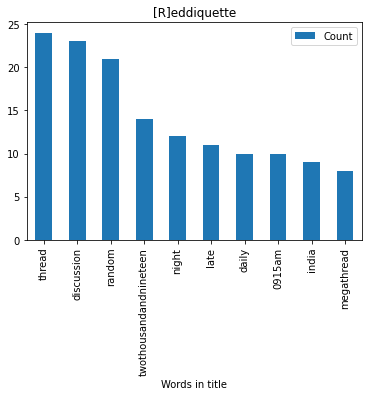

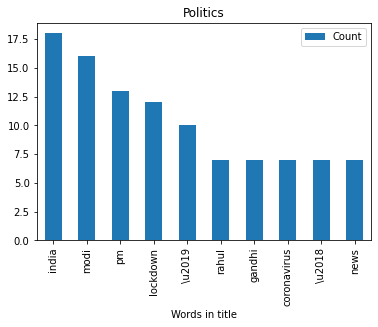

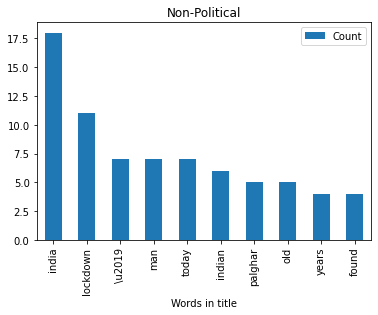

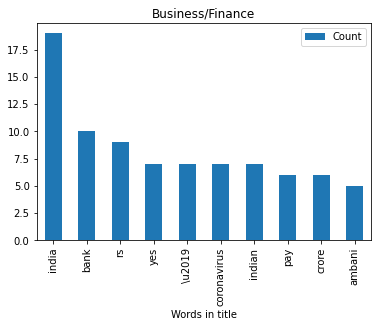

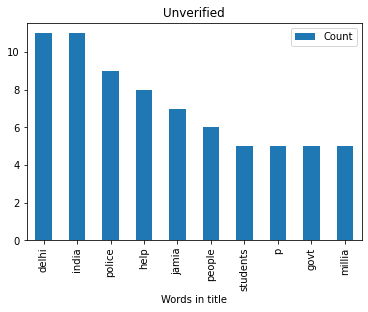

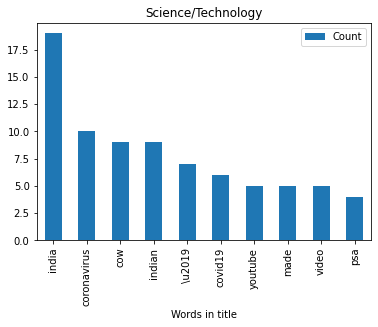

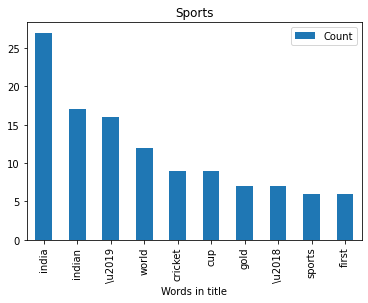

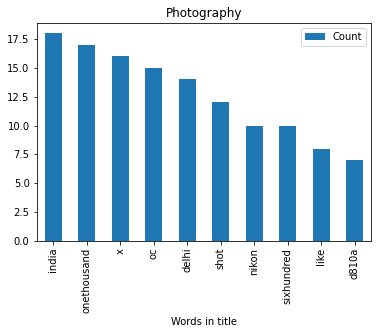

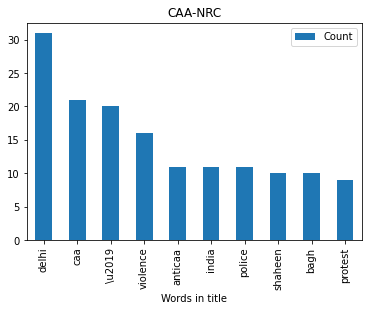

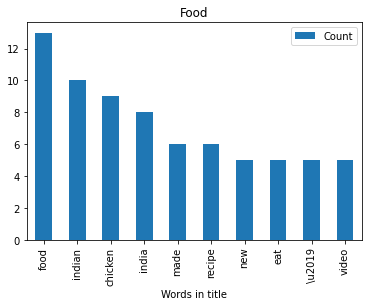

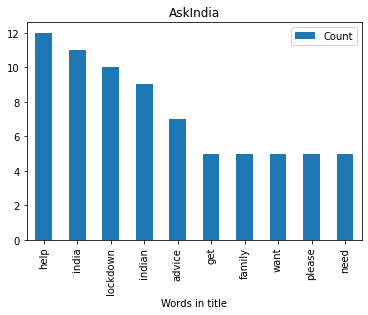

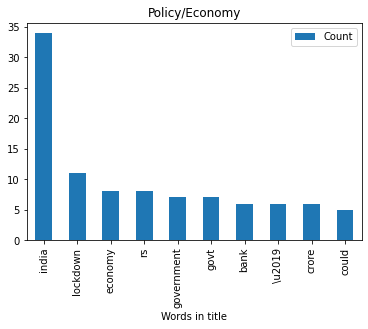

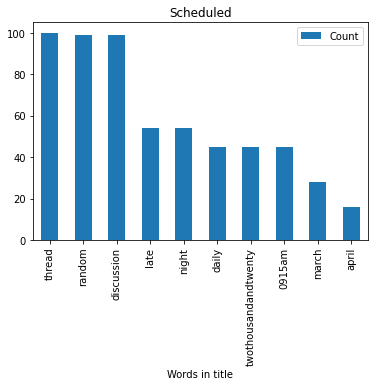

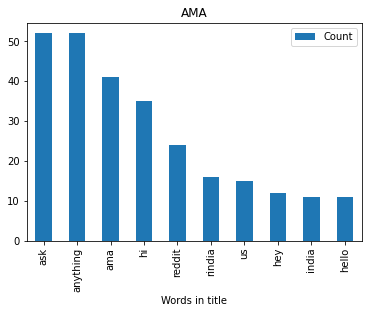

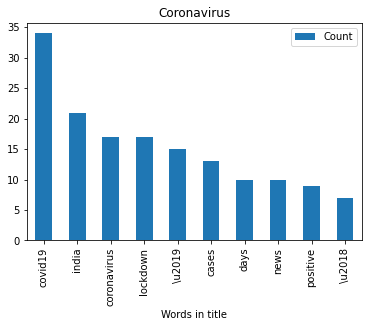

In [19]:
for f in flairs:
    most_common_w_in_attr(f,'title')
    

###  The results for body graph again pointed towards the fact that they were primarily empty and therefore in the majority of the graphs the word 'nan' i.e. empty strings was the most reappearing word and that too by a great margin.

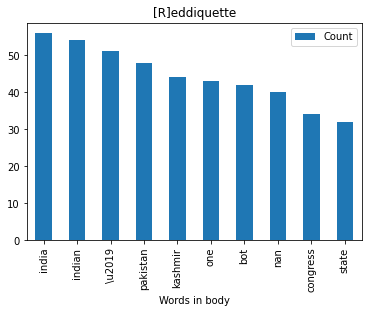

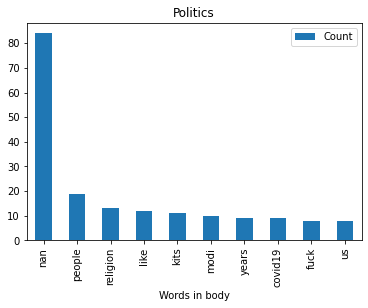

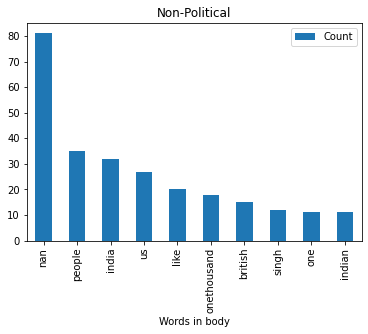

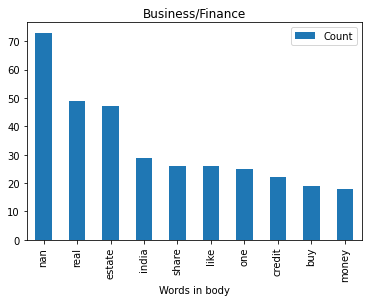

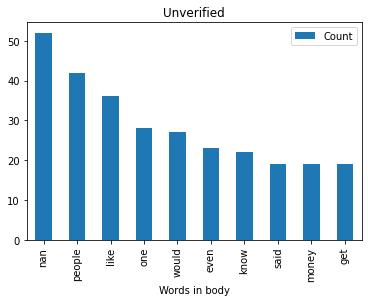

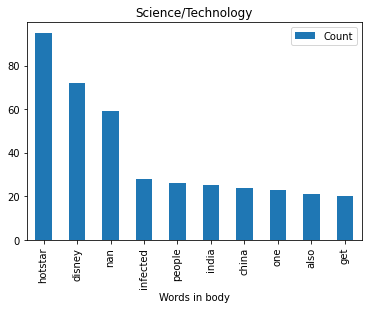

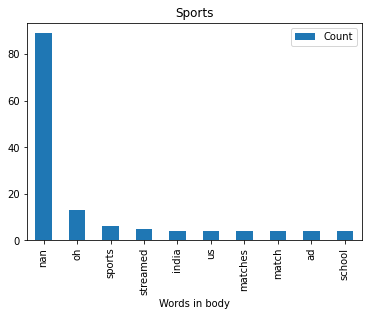

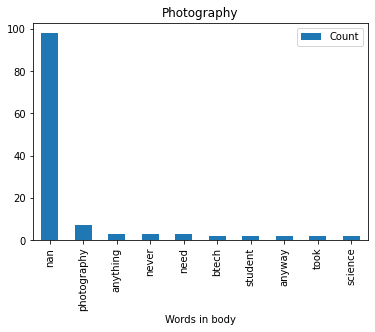

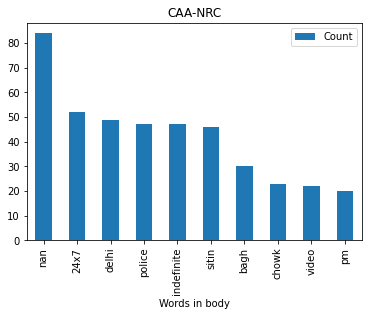

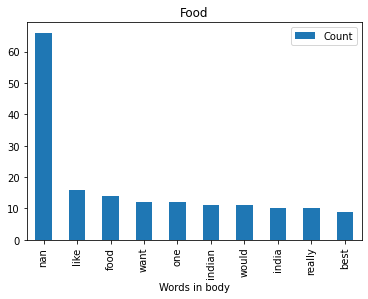

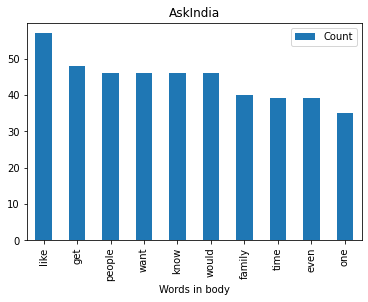

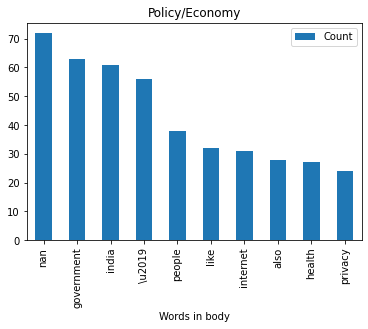

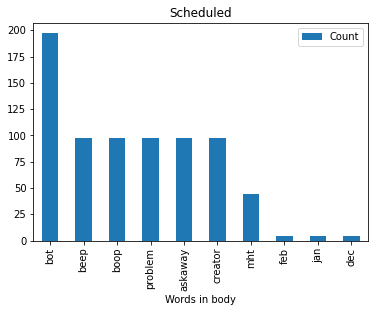

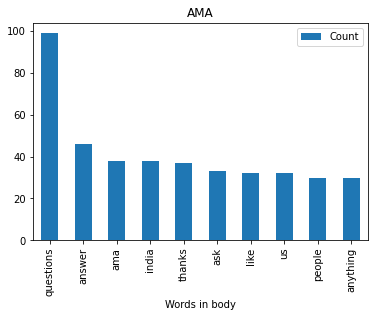

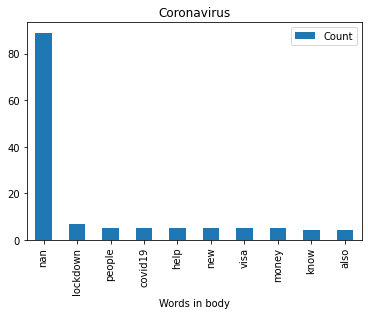

In [20]:
for f in flairs:
    most_common_w_in_attr(f,'body')
    

####  The graphs showed that most of the titles had India and People among the list of top 10 most appearing words.

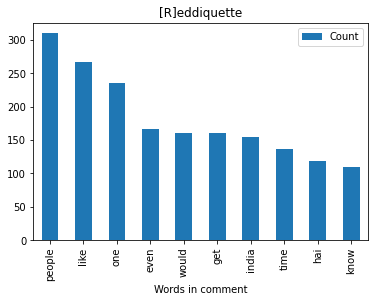

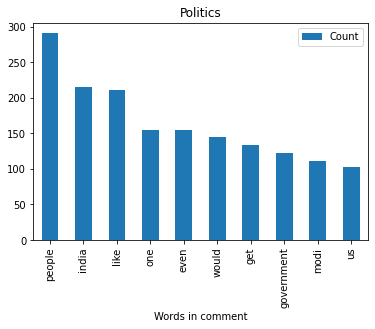

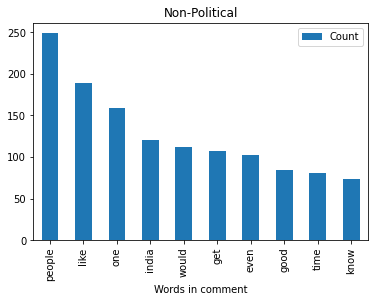

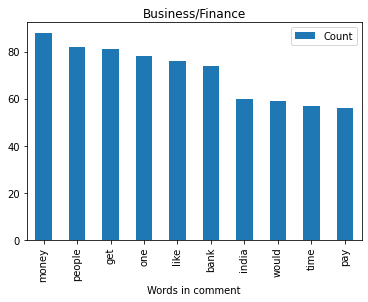

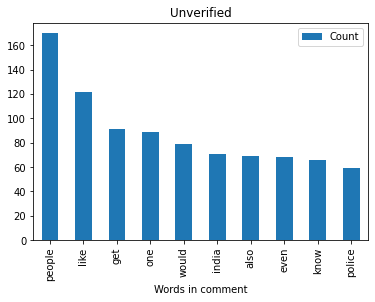

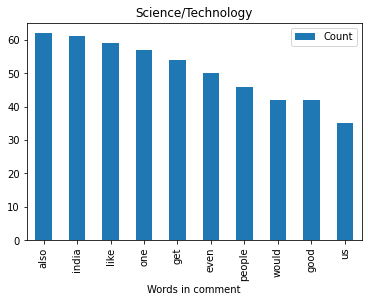

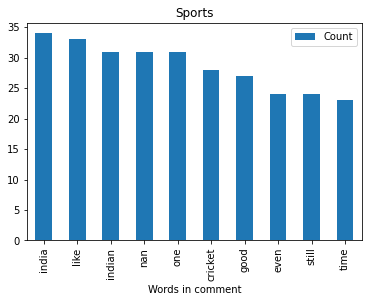

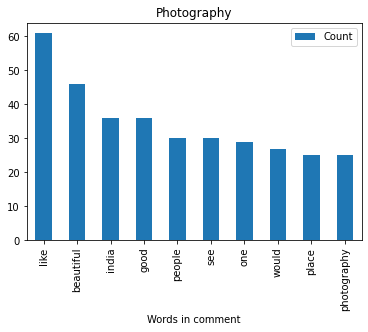

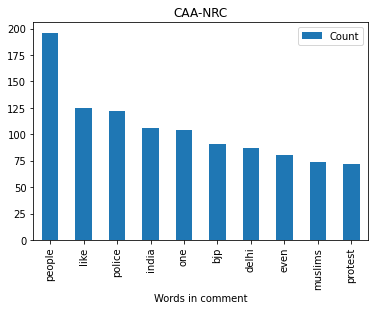

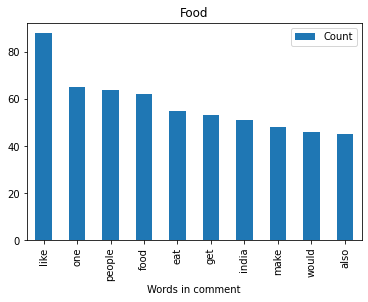

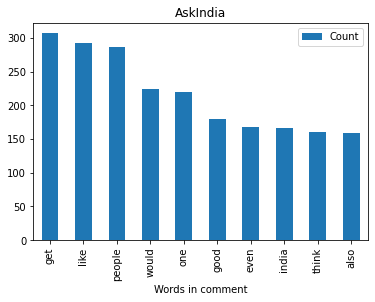

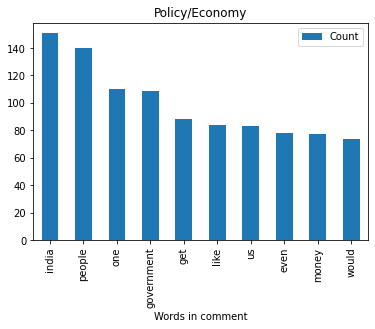

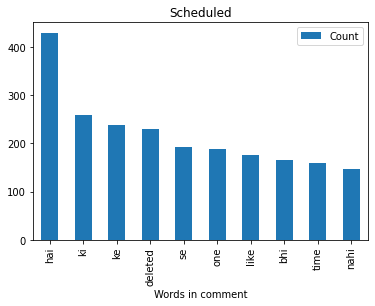

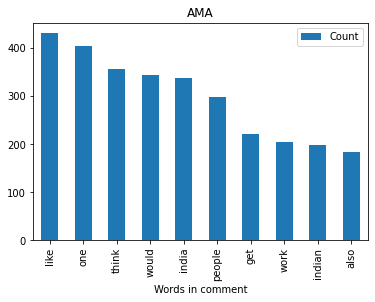

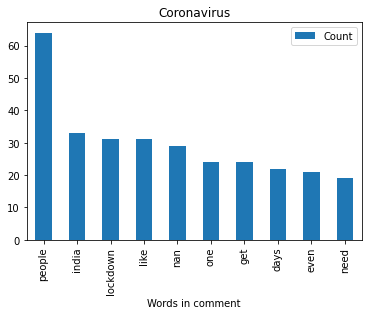

In [21]:
for f in flairs:
    most_common_w_in_attr(f,'comment')
    